In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scapy.all import rdpcap, Ether, IP,Dot1Q
import csv
import math
import os

In [27]:
def extract_pcap_to_csv(pcap_file, csv_file):
    packets = rdpcap(pcap_file)
    first_packet_time = packets[0].time if packets else None

    with open(csv_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['time', 'source', 'destination', 'vlan_prio'])

        for packet in packets:
            # Vérifier si le paquet contient un champ Dot1Q (VLAN tag)
            if Dot1Q in packet:
                vlan_prio = packet[Dot1Q].prio
                if Ether in packet and IP in packet:
                    src = packet[IP].src
                    dst = packet[IP].dst
                    time_since_first = packet.time - first_packet_time
                    writer.writerow([time_since_first, src, dst, vlan_prio])

def analyze_csv(csv_file):
    df = pd.read_csv(csv_file)

    # Calculer le temps moyen de réception pour chaque priorité
    mean_time_per_prio = df.groupby('vlan_prio')['time'].mean()

    # Afficher les statistiques
    print("Temps moyen de réception pour chaque priorité :")
    print(mean_time_per_prio)

    return df, mean_time_per_prio

def save_plots(df, mean_time_per_prio, output_dir):
    num_prios = len(df['vlan_prio'].dropna().unique())
    rows = math.ceil((num_prios + 1) / 2)  # Calculer le nombre de lignes nécessaire
    
    # Créer un dossier pour stocker les images
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Sauvegarder le graphique des temps moyens
    plt.figure(figsize=(15, 5))
    mean_time_per_prio.plot(kind='bar')
    plt.title('Temps moyen de réception par priorité VLAN')
    plt.xlabel('Priorité VLAN')
    plt.ylabel('Temps moyen (s)')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'mean_reception_time_per_priority.png'))
    plt.close()

    # Sauvegarder les graphiques de distribution temporelle des paquets pour chaque priorité
    unique_prios = sorted(df['vlan_prio'].dropna().unique())
    
    for i, prio in enumerate(unique_prios, start=1):
        plt.figure(figsize=(15, 5))
        df_prio = df[df['vlan_prio'] == prio]
        plt.hist(df_prio['time'], bins=50, alpha=0.7, label=f'Priority {prio}')
        plt.title(f'Distribution temporelle des paquets (Priorité {prio})')
        plt.xlabel('Temps (s)')
        plt.ylabel('Nombre de paquets')
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'Distribution_temporelle_priorité_{prio}.png'))
        plt.show()
        plt.close()
        
        
def plot_boxplots(df):
    plt.figure(figsize=(15, 7))
    df.boxplot(column='time', by='vlan_prio', grid=False)
    plt.title('Distribution temporelle des paquets par priorité VLAN')
    plt.suptitle('')  # Supprimer le titre par défaut de Pandas
    plt.xlabel('Priorité VLAN')
    plt.ylabel('Temps (s)')
    plt.savefig(os.path.join(output_dir, f'Distribution_temporelle_par_priorité.png'))
    plt.show()
    plt.close()


Temps moyen de réception pour chaque priorité :
vlan_prio
4     9.259649
5    10.017874
6     8.577606
Name: time, dtype: float64


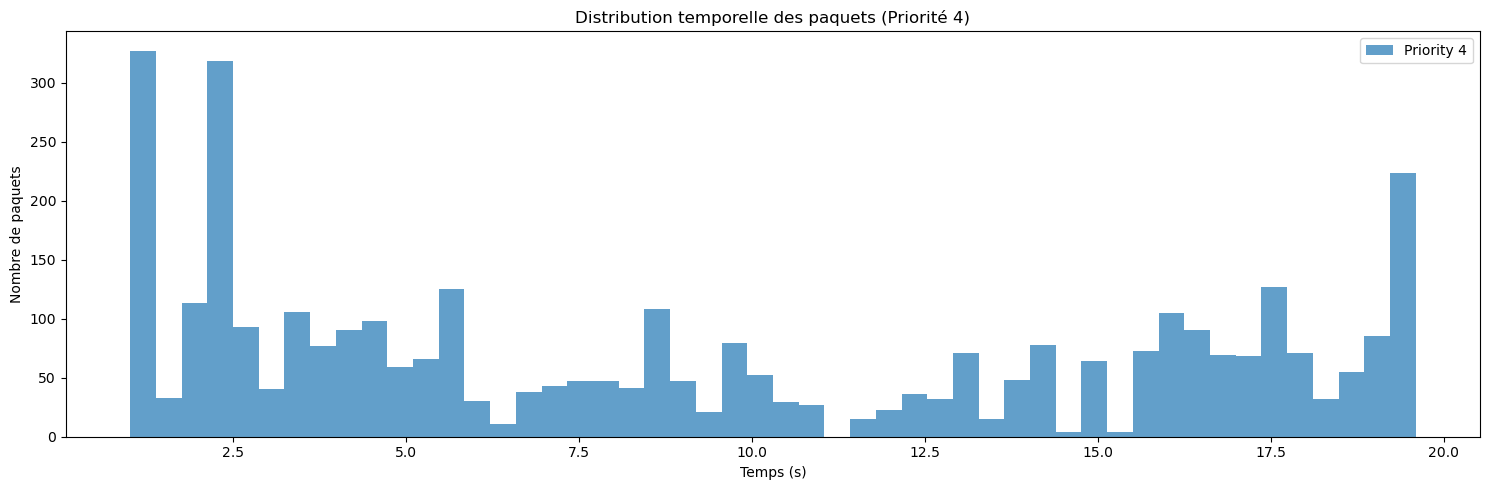

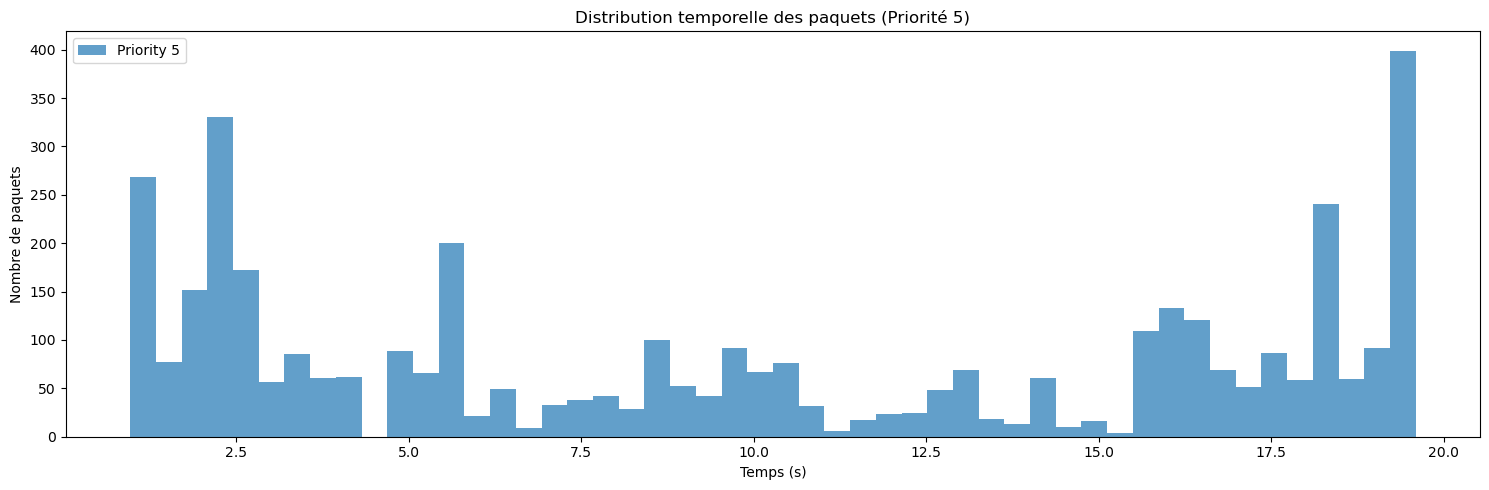

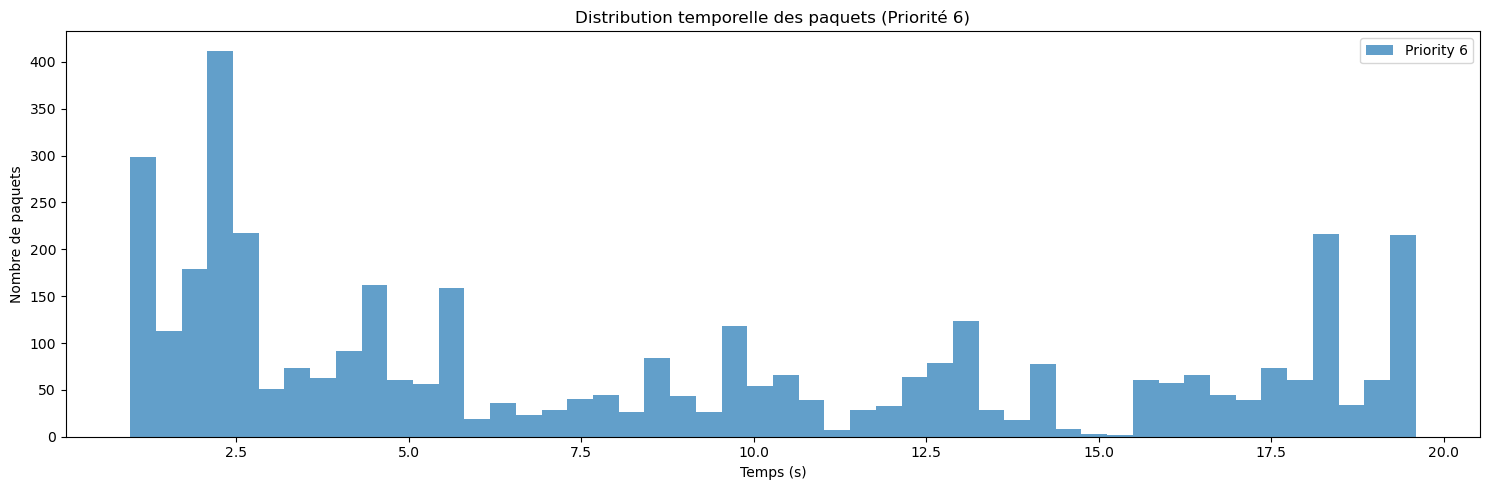

<Figure size 1500x700 with 0 Axes>

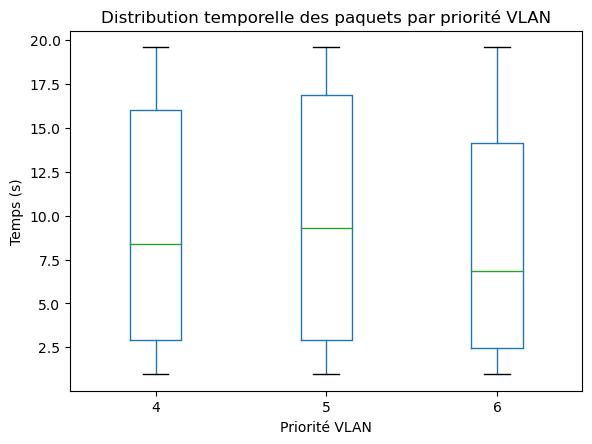

In [28]:

# Usage
output_dir = 'C:/Users/PROBOOK/Documents/MININET_SSH/IMAGES/NORMAL'
pcap_file = 'C:/Users/PROBOOK/Documents/MININET_SSH/RESULT/capture.pcap'
csv_file = 'C:/Users/PROBOOK/Documents/MININET_SSH/RESULT/normal.csv'

# Extraction des données du fichier PCAP vers CSV
extract_pcap_to_csv(pcap_file, csv_file)

# Analyse des données et génération des statistiques
df, mean_time_per_prio = analyze_csv(csv_file)

# Appeler la fonction pour sauvegarder les graphiques
save_plots(df, mean_time_per_prio, output_dir)

# Visualisation des résultats
plot_boxplots(df)


Temps moyen de réception pour chaque priorité :
vlan_prio
4    10.446316
5     8.878993
6     9.976271
Name: time, dtype: float64


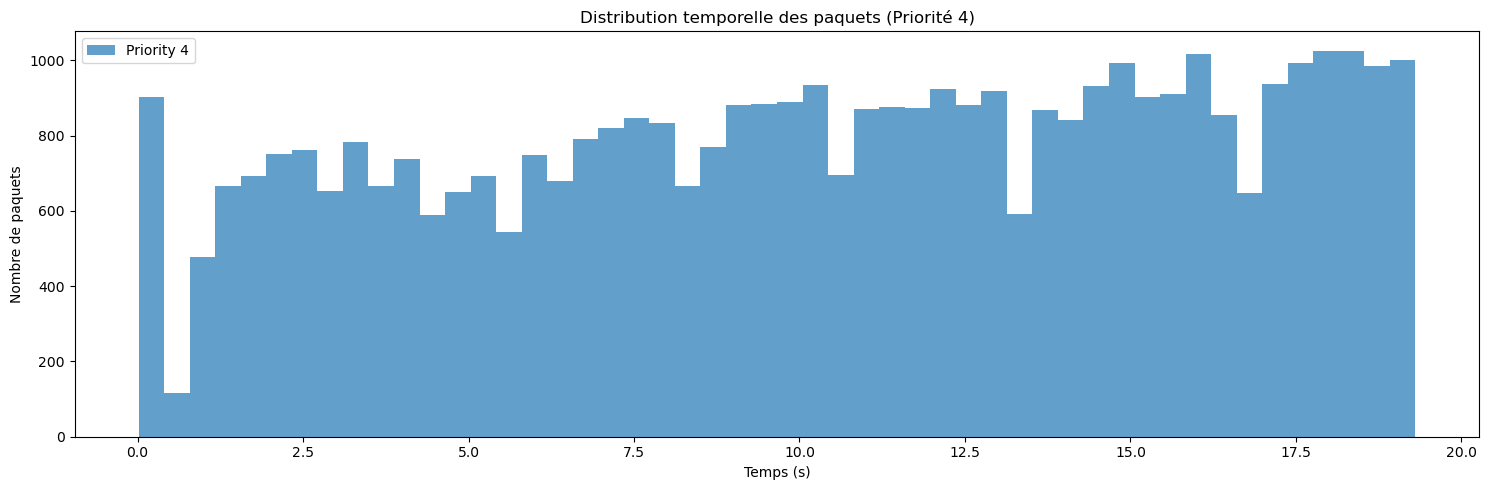

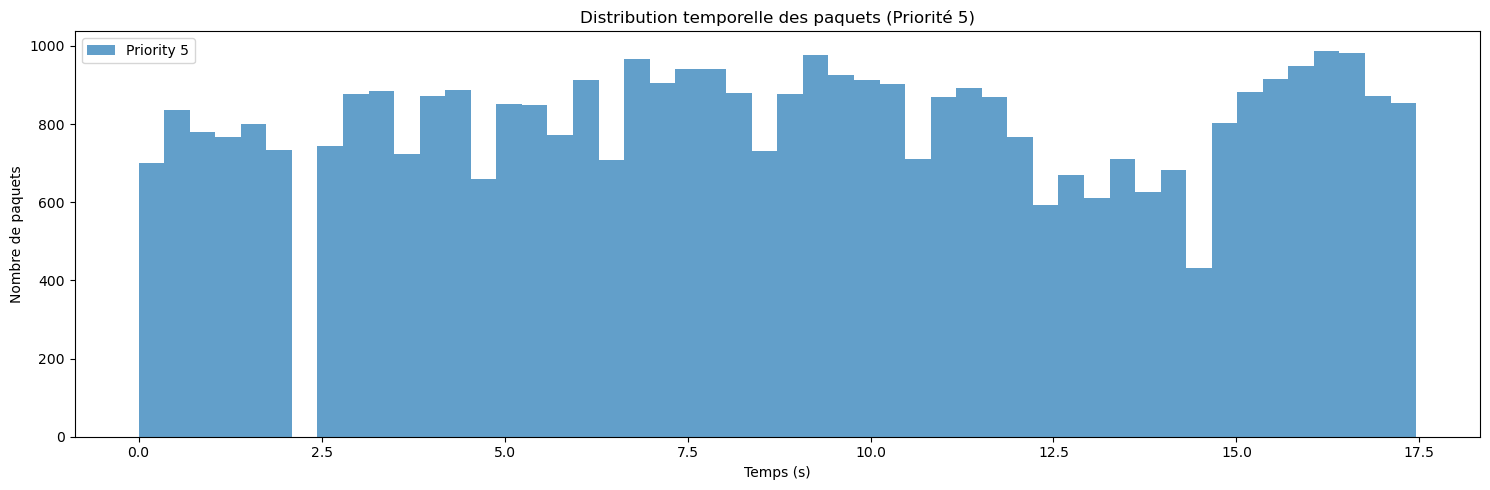

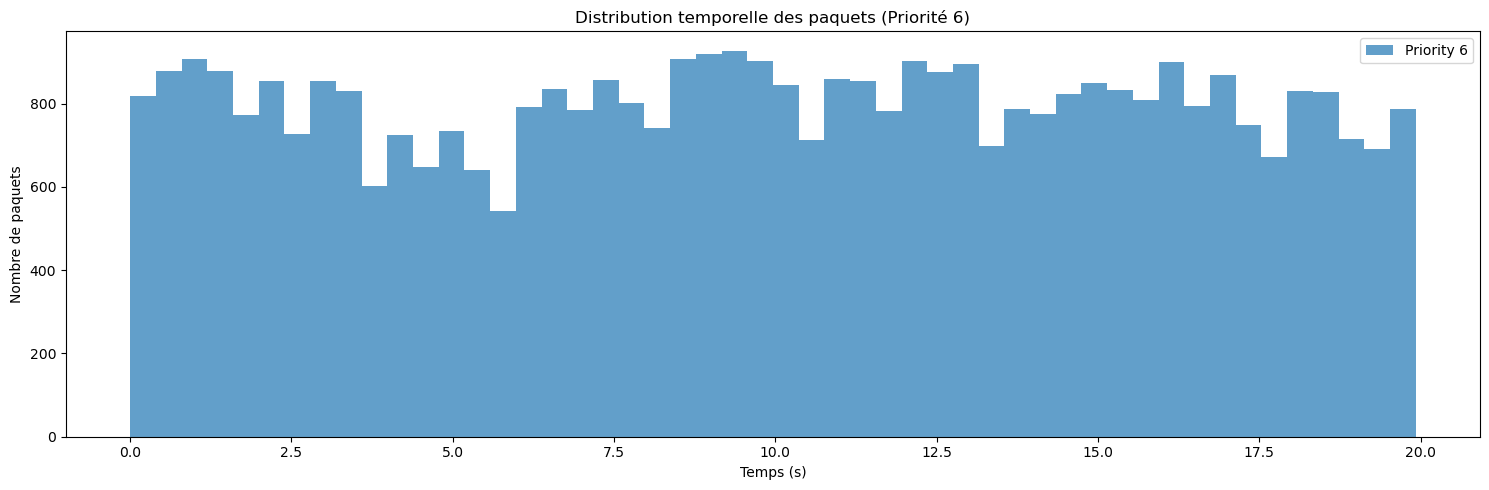

<Figure size 1500x700 with 0 Axes>

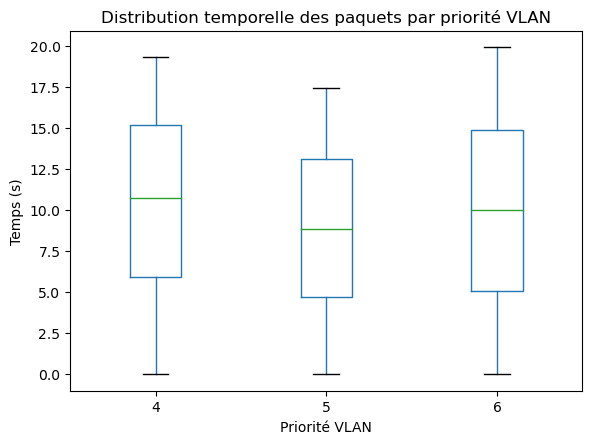

In [31]:
# Usage
output_dir = 'C:/Users/PROBOOK/Documents/MININET_SSH/IMAGES/TSN'
pcap_file = 'C:/Users/PROBOOK/Documents/MININET_SSH/RESULT/capture.pcap'
csv_file = 'C:/Users/PROBOOK/Documents/MININET_SSH/RESULT/hote_tsn.csv'

# Extraction des données du fichier PCAP vers CSV
extract_pcap_to_csv(pcap_file, csv_file)

# Analyse des données et génération des statistiques
df, mean_time_per_prio = analyze_csv(csv_file)

# Appeler la fonction pour sauvegarder les graphiques
save_plots(df, mean_time_per_prio, output_dir)

# Visualisation des résultats
plot_boxplots(df)